In [52]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

1. Carga de datos:
- Descarga el dataset «House Prices» de Kaggle. Realiza una exploración inicial de las variables numéricas y categóricas, prestando especial atención a aquellas que están relacionadas con el tamaño de la casa, el número de habitaciones y la calidad general.
- Revisa la distribución de la variable objetivo (precio de la casa) y observa si tiene algún sesgo.


In [31]:
data_path_train='../ejercicios_core/data/house_price_data/train.csv'
df_train = pd.read_csv(data_path_train)

df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [32]:
data_path_test='../ejercicios_core/data/house_price_data/test.csv'
df_test = pd.read_csv(data_path_test)

df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [33]:
##Verificacion inicial
utils.exploracion_inicial(df_train)

Informacion del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null

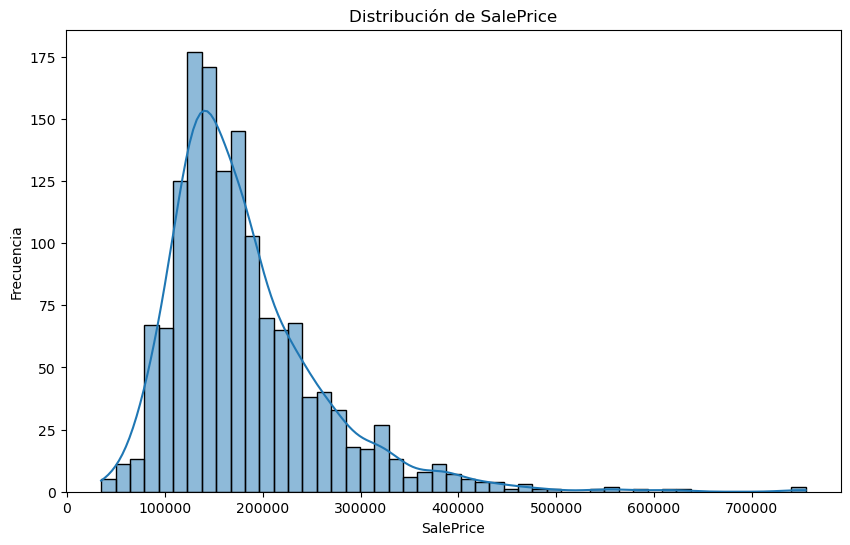

In [34]:
# Histograma
saleprice = df_train['SalePrice']
plt.figure(figsize=(10, 6))
sns.histplot(saleprice, kde=True)
plt.title('Distribución de SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

In [35]:
# Estadísticas descriptivas
mean_price = np.mean(saleprice)
median_price = np.median(saleprice)
skewness = saleprice.skew()
kurtosis = saleprice.kurt()

print(f'Media: {mean_price}')
print(f'Mediana: {median_price}')
print(f'Asimetría: {skewness}')
print(f'Curtosis: {kurtosis}')

Media: 180921.19589041095
Mediana: 163000.0
Asimetría: 1.8828757597682129
Curtosis: 6.536281860064529


La distribución del SalePrice está sesgada hacia la derecha, con una cola pesada que indica que hay algunas casas con precios extremadamente altos que afectan la media. Este tipo de distribución es común en mercados inmobiliarios, donde la mayoría de las casas tienen precios más accesibles y solo unas pocas tienen precios elevados.

2. Exploración y preprocesamiento de datos:
- Antes de aplicar las transformaciones, realiza un análisis de las variables con distribuciones asimétricas o que contengan outliers. Estos son buenos candidatos para transformaciones logarítmicas o polinómicas.
- También identifica variables que estén en escalas diferentes para aplicar técnicas de normalización o estandarización.



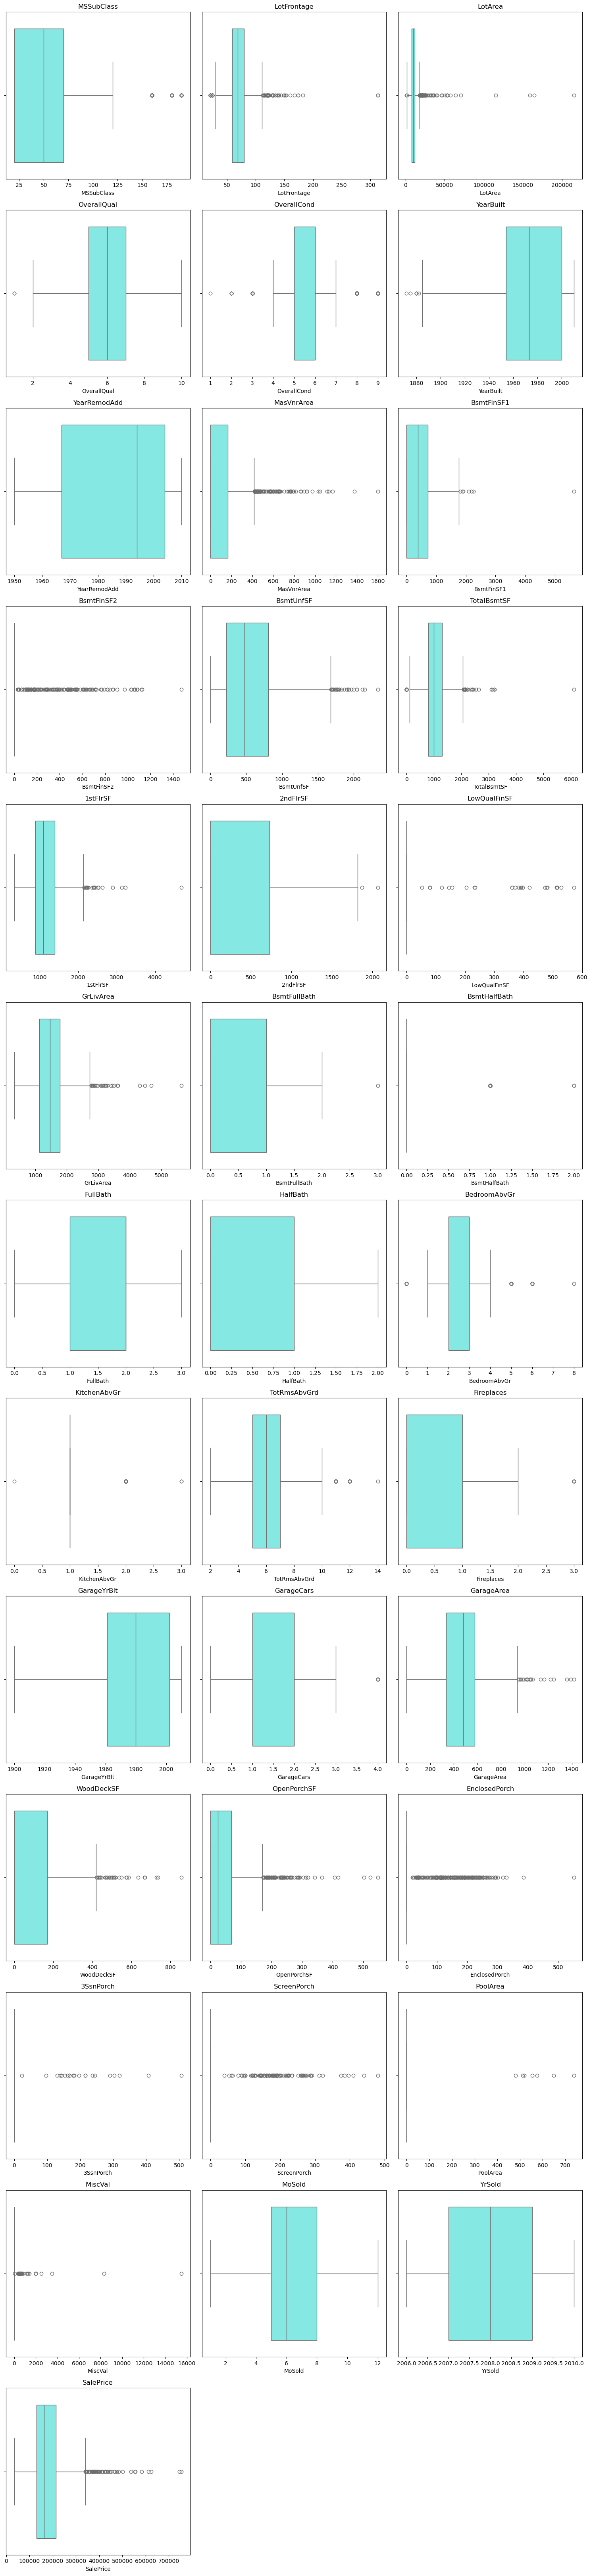

In [36]:
# Eliminar la columna 'Id' del DataFrame, no relevante 
df_train = df_train.drop('Id', axis=1)

data_numerico = df_train.select_dtypes(include=['int32','int64', 'float64']).columns

numeric_column_count = len(data_numerico)
#print(numeric_column_count)

utils.plot_grafico_outliers(data_numerico,13,3,df_train)

In [42]:
##Verificacion y ajustes de tipos de datos
#Usando Dic para modificar el tipo de datos. Sacado de sitio web https://www.geeksforgeeks.org/change-data-type-for-one-or-more-columns-in-pandas-dataframe/
convert_dict = {
                'MSSubClass': int,
                'MSZoning': str,
                'LotFrontage': float,
                'LotArea': int,
                'Street': str,
                'Alley': str,
                'LotShape': str,
                'LandContour': str,
                'Utilities': str,
                'LotConfig': str,
                'LandSlope': str,
                'Neighborhood': str,
                'Condition1': str,
                'Condition2': str,
                'BldgType': str,
                'HouseStyle': str,
                'OverallQual': int,
                'OverallCond': int,
                'YearBuilt': int,
                'YearRemodAdd': int,
                'RoofStyle': str,
                'RoofMatl': str,
                'Exterior1st': str,
                'Exterior2nd': str,
                'MasVnrType': str,
                'MasVnrArea': float,
                'ExterQual': str,
                'ExterCond': str,
                'Foundation': str,
                'BsmtQual': str,
                'BsmtCond': str,
                'BsmtExposure': str,
                'BsmtFinType1': str,
                'BsmtFinSF1': int,
                'BsmtFinType2': str,
                'BsmtFinSF2': int,
                'BsmtUnfSF': int,
                'TotalBsmtSF': int,
                'Heating': str,
                'HeatingQC': str,
                'CentralAir': str,
                'Electrical': str,
                '1stFlrSF': int,
                '2ndFlrSF': int,
                'LowQualFinSF': int,
                'GrLivArea': int,
                'BsmtFullBath': int,
                'BsmtHalfBath': int,
                'FullBath': int,
                'HalfBath': int,
                'BedroomAbvGr': int,
                'KitchenAbvGr': int,
                'KitchenQual': str,
                'TotRmsAbvGrd': int,
                'Functional': str,
                'Fireplaces': int,
                'FireplaceQu': str,
                'GarageType': str,
                'GarageYrBlt': float,
                'GarageFinish': str,
                'GarageCars': int,
                'GarageArea': int,
                'GarageQual': str,
                'GarageCond': str,
                'PavedDrive': str,
                'WoodDeckSF': int,
                'OpenPorchSF': int,
                'EnclosedPorch': int,
                '3SsnPorch': int,
                'ScreenPorch': int,
                'PoolArea': int,
                'PoolQC': str,
                'Fence': str,
                'MiscFeature': str,
                'MiscVal': int,
                'MoSold': int,
                'YrSold': int,
                'SaleType': str,
                'SaleCondition': str,
                'SalePrice': int,
                }

df_train = df_train.astype(convert_dict)
print("Dtype Modificado")
print(df_train.info())

Dtype Modificado
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int32  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int32  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int32  
 17  OverallCond    1460 non-null   int3

In [45]:
# Verificar si hay valores NaN o valores no numéricos en 'MSSubClass'
print(df_train['MSSubClass'].isnull().sum())  # Número de valores NaN
print(df_train['MSSubClass'].dtype)           # Ver el tipo de datos
print(df_train['MSSubClass'].unique())        # Ver los valores únicos en la columna

0
int32
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


In [51]:
X = df_train.drop(['SalePrice'], axis=1)
y = df_train['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [53]:
### Imputacion de valores faltantes y utilizacion de pipeline para modificar valores catogoricos
###Pipeline para preprocesamiento de valores
###Luego de la verificacion de las diferentes variables se puede tomar las siguientes variables como seleccion de features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',  # Example features
                     'FullBath', 'YearBuilt', '1stFlrSF', 'YearRemodAdd',
                     'GarageArea','Fireplaces','LotArea','Neighborhood',
                     'Condition2','RoofMatl','Exterior2nd','FireplaceQu',
                     'KitchenQual','BsmtQual']

# Crear un nuevo DataFrame solo con los features seleccionados.
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
# Definir transformaciones
numeric_features = X_train_selected.select_dtypes(include=['float64', 'int']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# En este dataset no hay categóricas, pero se puede añadir una columna categórica ficticia para la práctica
categorical_features = X_train_selected.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Integrar en un pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Aplicar preprocesamiento
X_transformed = pipeline.fit_transform(X_train_selected,y_train)
print("Preprocesamiento completado. Datos transformados listos para modelar.")

Preprocesamiento completado. Datos transformados listos para modelar.


##### Verificar!!!!!